<a href="https://colab.research.google.com/github/marce3-2140/Neural-Networks/blob/main/Titanic_competitions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/CD-DS-Course/blob/main/docs/extra_project_template/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**📈 Titanic Competitions**


**Presentado por:** Marcela Giraldo

* **Tomado de:** [kaggle.com/datasets/rajanand/cab-survey](https://www.kaggle.com/competitions/titanic/data?select=gender_submission.csv)

**Track:**
El conjunto de entrenamiento debe usarse para construir sus modelos de aprendizaje automático. Para el conjunto de capacitación, proporcionamos el resultado (también conocido como "verdad sobre el terreno") para cada pasajero. Su modelo se basará en "características" como el género y la clase de los pasajeros. También puede utilizar la ingeniería de funciones para crear nuevas funciones.

El conjunto de prueba debe usarse para ver qué tan bien se desempeña su modelo con datos invisibles. Para el conjunto de prueba, no proporcionamos la verdad sobre el terreno para cada pasajero. Es su trabajo predecir estos resultados. Para cada pasajero del conjunto de prueba, utilice el modelo que entrenó para predecir si sobrevivió o no al hundimiento del Titanic.



In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **TRAIN**

Este archivo contiene el ID, premisa, hipótesis y etiqueta, así como el idioma del texto y su abreviatura de dos letras.

In [3]:
file_train = '/content/drive/MyDrive/CodingDojo/Modulos/Redes Neuronales/Kaggle_Competitions/Titanic/train.csv'
df_train = pd.read_csv(file_train)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.duplicated().sum()

0

In [5]:
df_train.shape

(891, 12)

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
age_null= df_train['Age'].isnull()
print(age_null.sum()/len(df_train))
df_train.loc[age_null,:].head()

0.19865319865319866


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [9]:
df_train = df_train.dropna(subset=['Age'])

In [10]:
df_train = df_train.drop(columns=['Cabin', 'Embarked', 'PassengerId', 'Name', 'Ticket'])

In [11]:
df_train.shape

(714, 7)

### **TEST**

Este archivo contiene el ID, la premisa, la hipótesis, el idioma y la abreviatura del idioma, sin etiquetas.

In [12]:
file_test = '/content/drive/MyDrive/CodingDojo/Modulos/Redes Neuronales/Kaggle_Competitions/Titanic/test.csv'
df_test = pd.read_csv(file_test)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
df_test.duplicated().sum()

0

In [14]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
age_null= df_test['Age'].isnull()
print(age_null.sum()/len(df_test))
df_test.loc[age_null,:].head()

0.20574162679425836


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S


In [17]:
df_test = df_test.dropna(subset=['Age'])

In [18]:
df_test = df_test.drop(columns=['Cabin', 'Embarked', 'PassengerId', 'Name', 'Ticket'])

In [19]:
df_test.shape

(332, 6)

In [20]:
df_test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [21]:
mapeo = {1: 'female', 2: 'male'}
df_train['Sex'] = df_train['Sex'].map(mapeo)

In [22]:
mapeo = {1: 'female', 2: 'male'}
df_test['Sex'] = df_test['Sex'].map(mapeo)

In [23]:
columnas_a_convertir = ['Pclass', 'SibSp', 'Parch', 'Survived', 'Sex']

for columna in columnas_a_convertir:
    df_train[columna] = df_train[columna].astype(np.float32)

In [24]:
columnas_a_convertir = ['Pclass', 'SibSp', 'Parch', 'Sex']

for columna in columnas_a_convertir:
    df_test[columna] = df_test[columna].astype(np.float32)

**Target**

In [25]:
df_train['Survived'].value_counts()

0.0    424
1.0    290
Name: Survived, dtype: int64

### **Preprocesing**

In [45]:
# Split data

X = df_train.drop(columns = 'Survived')

# Target
y = df_train['Survived']

#Se definen los feautures a usar por el modelo
X_test = df_test

In [46]:
X_train, X_val, y_train, y_val=train_test_split(X,y,random_state=42)

In [47]:
#Separamos columnas numericas y categoricas
numeric_features = X_train.select_dtypes(include=['int64', 'float32']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

#instanciar pipelines para imputar para datos numericos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#instanciar pipelines para imputar para datos categoricos
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#transformar los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [48]:
#entrenar con X_train y aplicar a X_train y X_test
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index([], dtype='object'))])

In [49]:
X_train=preprocessor.transform(X_train)
X_val=preprocessor.transform(X_val)
X_test=preprocessor.transform(X_test)
#X_val = preprocessor.transform(X_val)

In [50]:
X_train = pd.DataFrame(X_train)
X_val= pd.DataFrame(X_val)
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2
0,0.930688,-0.541171,-0.506858
1,0.930688,0.585392,-0.506858
2,-0.257661,-0.541171,-0.506858
3,0.930688,-0.541171,-0.506858
4,0.930688,0.585392,0.632508


In [54]:
# Input shape
input_shape = X_train.shape[1]
print(input_shape)

3


In [61]:
# Modelo sin regularización
model = Sequential()
# Primera capa oculta
model.add(Dense(3,
                input_dim = input_shape, # Aquí usamos input_shape
                activation = 'relu'))
# A continuación agregamos nuestra capa de dropout
model.add(Dropout(.3))
# Segunda capa oculta
model.add(Dense(10,
                activation = 'relu'))

# Última capa - Debe tener el mismo número de neuronas que el número de clases
# En este caso, asumimos que hay 6 clases
model.add(Dense(1, activation = 'sigmoid')) # Usamos 'softmax' para clasificación multiclase

model.compile(loss = 'bce', optimizer = 'sgd', metrics=['accuracy']) # Usamos 'categorical_crossentropy' para clasificación multiclase
early_stopping = EarlyStopping(patience = 5) # Número de iteraciones sin mejora antes de parar el entrenamiento

history_earlystop = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=200,
                    callbacks = [early_stopping])

Epoch 1/200
17/17 [==============================] - 1s 13ms/step - loss: 0.7901 - accuracy: 0.5813 - val_loss: 0.7733 - val_accuracy: 0.5922
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7686 - accuracy: 0.5682 - val_loss: 0.7505 - val_accuracy: 0.5642
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.7349 - accuracy: 0.5925 - val_loss: 0.7354 - val_accuracy: 0.5475
Epoch 4/200
17/17 [==============================] - 0s 5ms/step - loss: 0.7273 - accuracy: 0.5570 - val_loss: 0.7229 - val_accuracy: 0.5419
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.7204 - accuracy: 0.5551 - val_loss: 0.7123 - val_accuracy: 0.5475
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.5776 - val_loss: 0.7042 - val_accuracy: 0.5419
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.5813 - val_loss: 0.6986 - val_accuracy: 0.5307
Epoch 8/200


In [56]:
y_pred=model.predict(X_test)

11/11 [==============================] - 0s 1ms/step


In [59]:
y_pred=pd.DataFrame(y_pred)
y_pred.to_csv("output.csv")

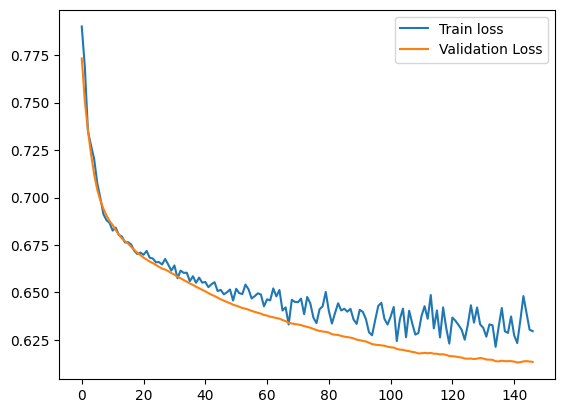

In [62]:
# Visualizar la perdida
plt.plot(history_earlystop.history['loss'], label='Train loss')
plt.plot(history_earlystop.history['val_loss'], label='Validation Loss')
plt.legend();

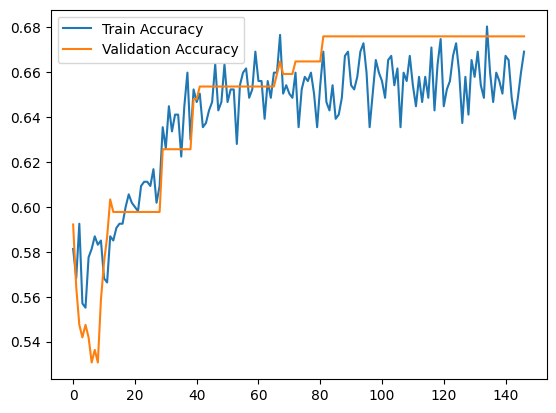

In [63]:
# Visualizar el accuracy
plt.plot(history_earlystop.history['accuracy'], label='Train Accuracy')
plt.plot(history_earlystop.history['val_accuracy'], label='Validation Accuracy')
plt.legend();

In [70]:
# Modelo sin regularización
model = Sequential()
# Primera capa oculta
model.add(Dense(3,
                input_dim = input_shape,
                activation = 'relu'))
# A continuación agregamos nuestra capa de dropout

model.add(Dense(10,
                activation = 'relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy']) # bce: binary cross entropy
early_stopping = EarlyStopping(patience = 5) # Número de iteraciones sin mejora antes de parar el entrenamiento
history_earlystop = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=200,
                    batch_size=8,
                    callbacks = [early_stopping])

Epoch 1/200
67/67 [==============================] - 1s 3ms/step - loss: 0.7513 - accuracy: 0.3963 - val_loss: 0.7368 - val_accuracy: 0.3352
Epoch 2/200
67/67 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.4523 - val_loss: 0.6969 - val_accuracy: 0.3743
Epoch 3/200
67/67 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5458 - val_loss: 0.6768 - val_accuracy: 0.5978
Epoch 4/200
67/67 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5907 - val_loss: 0.6683 - val_accuracy: 0.5978
Epoch 5/200
67/67 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5907 - val_loss: 0.6644 - val_accuracy: 0.5978
Epoch 6/200
67/67 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5925 - val_loss: 0.6615 - val_accuracy: 0.5978
Epoch 7/200
67/67 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.5925 - val_loss: 0.6590 - val_accuracy: 0.5978
Epoch 8/200
6

In [66]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 3)                 12        
                                                                 
 dense_25 (Dense)            (None, 10)                40        
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 63 (252.00 Byte)
Trainable params: 63 (252.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


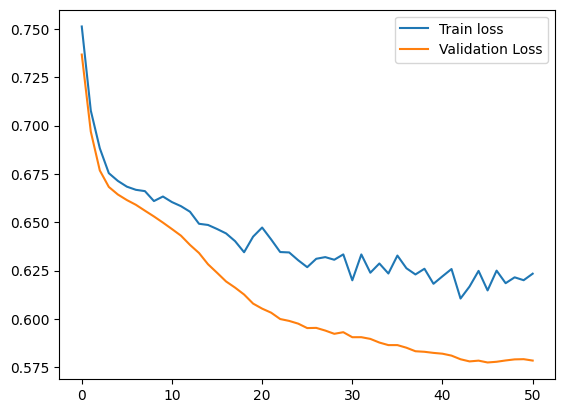

In [71]:
# Visualizar la perdida
plt.plot(history_earlystop.history['loss'], label='Train loss')
plt.plot(history_earlystop.history['val_loss'], label='Validation Loss')
plt.legend();

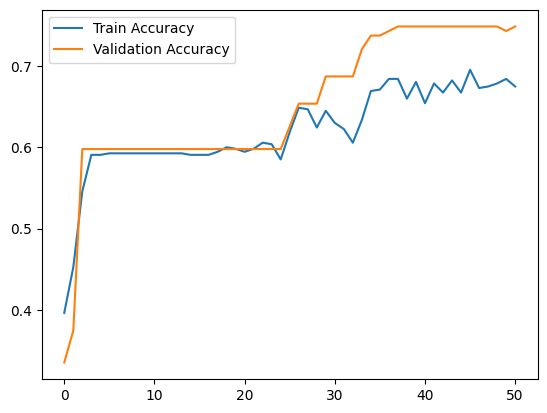

In [72]:
# Visualizar el accuracy
plt.plot(history_earlystop.history['accuracy'], label='Train Accuracy')
plt.plot(history_earlystop.history['val_accuracy'], label='Validation Accuracy')
plt.legend();